# **PERSONAS ADULTAS MAYORES EN EL DISTRITO DE LURÍN - [MDL]**

**Link:** <a href="https://www.datosabiertos.gob.pe/dataset/personas-adultas-mayores-en-el-distrito-de-lur%C3%ADn-mdl">Personas adultas mayores en el distrito de Lurín</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import math
import re

# Librerías para realizar WordCloud
import nltk
from nltk.corpus import stopwords
import wordcloud
from PIL import Image
import PIL.Image
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

# Librerías para la clasificación Random Forest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree as trees

In [2]:
data = pd.read_csv(r'dataset_Lurin.csv', 
                  encoding = 'latin-1', delimiter = ";").iloc[:,1:]
data.head()

,FECHACORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,SEXO,FECHNACI,EDAD,ESTCIV,CANTHIJ,...,PROSALUD,RECTRATAMIENTO,DISCVISION,DISCAUDITIVA,DISCMOTRIZ,DISCRECORDAR,DISCCUIPROPIO,DISCHABLAR,CONADIS,SERESPERA
0,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,10/02/1941,82,SOLTERO(A),2.0,...,SI,SI,NaN,NaN,NaN,NaN,NaN,NaN,NO,PENSION 65
1,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,08/10/1960,62,VIUDO(A),8.0,...,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
2,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,01/07/1956,66,SOLTERO(A),1.0,...,NO,NO,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NO,TALLERES Y PASEOS
3,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,30/01/1954,69,CASADO(A),NaN,...,SI,SI,CIERTA DIFICULTAD,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NO,TALLERES
4,07/06/2023,LIMA,LIMA,LURIN,150119,MASCULINO,02/07/1934,88,CASADO(A),5.0,...,SI,NO,NO PUEDE DEL TODO,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,NO,"QUE LO AYUDEN EN LA PENSION 65, PORQUE LE QUIT..."


### Análisis de la información ***per se***

In [3]:
print(f'''En el Distrito de Lurín existen {data.shape[0]} personas adultas mayores registrados en la base de datos 
perteneciente a la Unidad Funcional de Centro Integral de Atención al Adulto.''')

En el Distrito de Lurín existen 467 personas adultas mayores registrados en la base de datos 
perteneciente a la Unidad Funcional de Centro Integral de Atención al Adulto.


In [4]:
print("Valores nulos")
print("######################")
data.isnull().sum()

Valores nulos
######################


FECHACORTE          0
DEPARTAMENTO        0
PROVINCIA           0
DISTRITO            0
UBIGEO              0
SEXO                0
FECHNACI            0
EDAD                0
ESTCIV              0
CANTHIJ           117
PAISNACIMIENTO      0
ETNIA               0
LENGMATERN        269
NIVESTUDIOS        88
PROFESION         438
VIVIENDA            0
SEGSALUD           84
AFILSERESTADO       0
SISFOH              0
NIVPOBREZA        352
TRABAJO             0
PROSALUD            0
RECTRATAMIENTO      0
DISCVISION         89
DISCAUDITIVA       89
DISCMOTRIZ         89
DISCRECORDAR       89
DISCCUIPROPIO      89
DISCHABLAR         89
CONADIS             0
SERESPERA          96
dtype: int64

In [5]:
print("Tipo de variables")
print("#########################")
data.dtypes

Tipo de variables
#########################


FECHACORTE         object
DEPARTAMENTO       object
PROVINCIA          object
DISTRITO           object
UBIGEO              int64
SEXO               object
FECHNACI           object
EDAD                int64
ESTCIV             object
CANTHIJ           float64
PAISNACIMIENTO     object
ETNIA              object
LENGMATERN         object
NIVESTUDIOS        object
PROFESION          object
VIVIENDA           object
SEGSALUD           object
AFILSERESTADO      object
SISFOH             object
NIVPOBREZA         object
TRABAJO            object
PROSALUD           object
RECTRATAMIENTO     object
DISCVISION         object
DISCAUDITIVA       object
DISCMOTRIZ         object
DISCRECORDAR       object
DISCCUIPROPIO      object
DISCHABLAR         object
CONADIS            object
SERESPERA          object
dtype: object

In [6]:
print("Nombres de las columnas")
print("#########################")
data.columns

Nombres de las columnas
#########################


Index(['FECHACORTE', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'SEXO',
       'FECHNACI', 'EDAD', 'ESTCIV', 'CANTHIJ', 'PAISNACIMIENTO', 'ETNIA',
       'LENGMATERN', 'NIVESTUDIOS', 'PROFESION', 'VIVIENDA', 'SEGSALUD',
       'AFILSERESTADO', 'SISFOH', 'NIVPOBREZA', 'TRABAJO', 'PROSALUD',
       'RECTRATAMIENTO', 'DISCVISION', 'DISCAUDITIVA', 'DISCMOTRIZ',
       'DISCRECORDAR', 'DISCCUIPROPIO', 'DISCHABLAR', 'CONADIS', 'SERESPERA'],
      dtype='object')

**Es importante mencionar que se presentan varios datos nulos en las columnas a nivel de filas por lo que tomé la decisión de utilizar las variables con 0 datos nulos para el desarrollo de la analítica y aplicaré las técnicas de imputación al momento de generar un modelo de machine learning. Por último, crearé un modelo de análisis textual para plasmarlo en un WordCloud en el cuál sí eliminaré aquellas filas que tienen valores nulos.**

## **Análisis Exploratorio de Datos**

In [7]:
# Funciones
def plotDecorator(ax):
    ax.bar_label(ax.containers[0], fontsize=11)
    for i in ['bottom', 'left']:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(1.5) 
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
    
def segmentationChildren(row):
    if row <= 3:
        return "Personas con 3 o menos hijos"
    elif row > 3 and row <= 6:
        return "Personas con más de 3 hijos y hasta 6 hijos"
    elif row > 6:
        return "Personas con más de 6 hijos"
    elif math.isnan(row):
        return "Información no disponible"

def segmentationEducationalLevel(row):
    if row == "nan":
        return "Información no disponible"
    else:
        return row

def segmentationHealthLevel(row):
    if row == "nan":
        return "Información no disponible"
    else:
        return row
    
def segmentationPoverty(row):
    if row == "nan":
        return "INFORMACIÓN NO DISPONIBLE"
    else:
        return row

def segmentationJob(row):
    if row == "nan":
        return "INFORMACIÓN NO DISPONIBLE"
    else:
        return row

### 1. Análisis demográfico

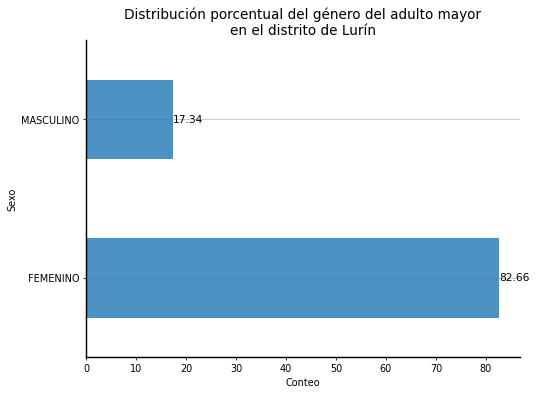

In [8]:
df1 = pd.DataFrame(data.groupby("SEXO")["EDAD"].count()).apply(lambda x :
                round(x/len(data["SEXO"])*100,2))
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df1.plot(kind = 'barh', ax = ax, alpha = 0.8)
plt.title("Distribución porcentual del género del adulto mayor\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Sexo")
plt.legend().set_visible(False)
plt.show()

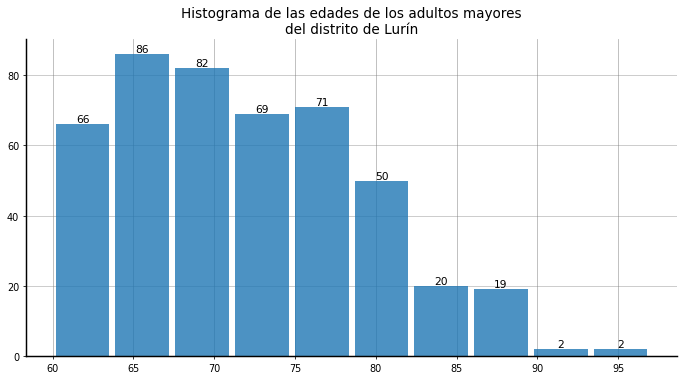

In [9]:
df2 = data["EDAD"]
fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
df2.hist(rwidth=0.9, alpha = 0.8)
plotDecorator(ax)
plt.title("Histograma de las edades de los adultos mayores\ndel distrito de Lurín", size = 14)
plt.show()

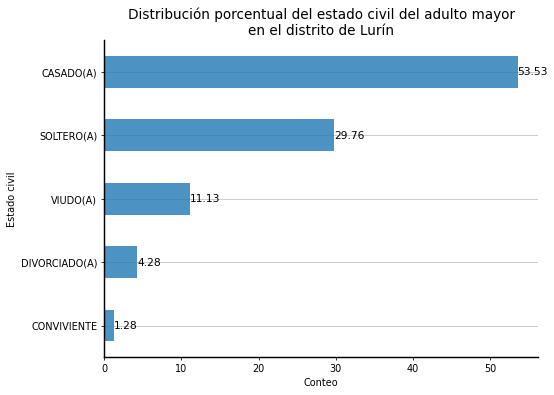

In [10]:
df3 = pd.DataFrame(data.groupby("ESTCIV")["EDAD"].count(
)).sort_values("EDAD", ascending = True).apply(lambda x : 
round(x / len(data["ESTCIV"])*100,2))
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df3.plot(kind = 'barh', ax = ax, label = "Sexo", alpha = 0.8)
plt.title("Distribución porcentual del estado civil del adulto mayor\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Estado civil")
plt.legend().set_visible(False)
plt.show()

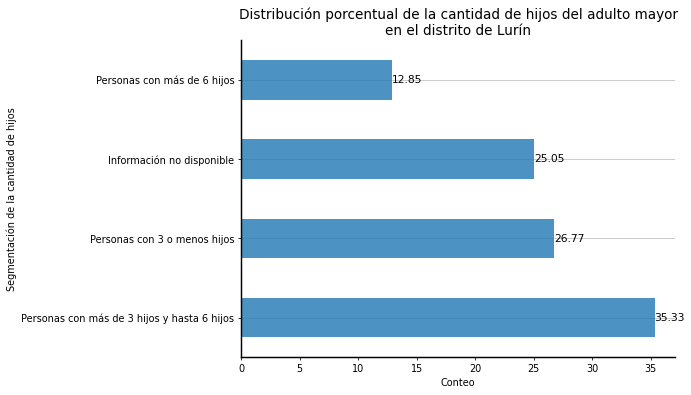

In [11]:
data["CANTHIJ_SEG"] = data["CANTHIJ"].apply(segmentationChildren)
df4 = pd.DataFrame(data["CANTHIJ_SEG"].value_counts()).apply(lambda x : 
    round(x / len(data["EDAD"]) * 100,2))
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df4.plot(kind = 'barh', ax = ax, label = "Sexo", alpha = 0.8)
plt.title("Distribución porcentual de la cantidad de hijos del adulto mayor\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Segmentación de la cantidad de hijos")
plt.legend().set_visible(False)
plt.show()

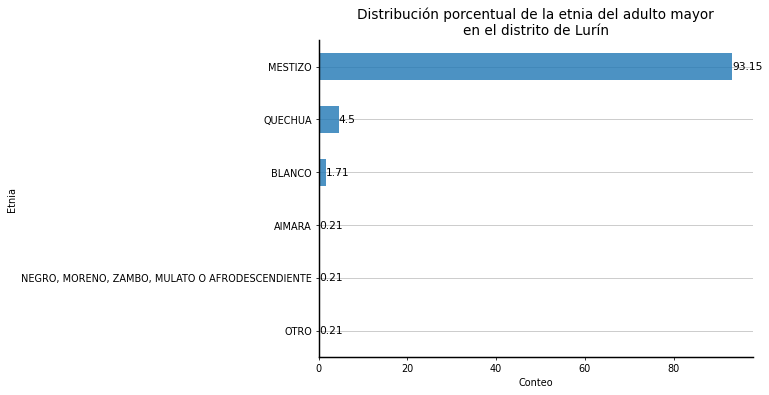

In [12]:
df5 = pd.DataFrame(data["ETNIA"].value_counts()).apply(lambda x : 
        round(x / len(data["EDAD"]) * 100,2)).sort_values("ETNIA",ascending = True)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df5.plot(kind = 'barh', ax = ax, alpha = 0.8)
plt.title("Distribución porcentual de la etnia del adulto mayor\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Etnia")
plt.legend().set_visible(False)
plt.show()

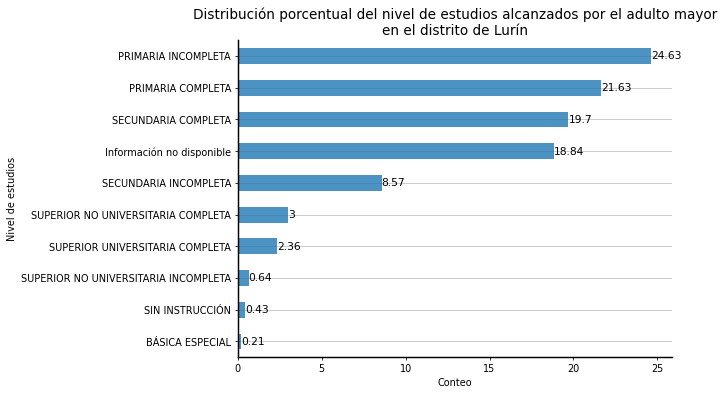

In [13]:
data["NIVESTUDIOS"] = data["NIVESTUDIOS"].astype(str).apply(segmentationEducationalLevel)
df6 = pd.DataFrame(data["NIVESTUDIOS"].value_counts()).apply(lambda x :
        round(x / len(data["NIVESTUDIOS"]) * 100 ,2)).sort_values("NIVESTUDIOS",
                    ascending = True)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df6.plot(kind = 'barh', ax = ax, alpha = 0.8)
plt.title("Distribución porcentual del nivel de estudios alcanzados por el adulto mayor\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Nivel de estudios")
plt.legend().set_visible(False)
plt.show()

### 2. Acceso a la salud

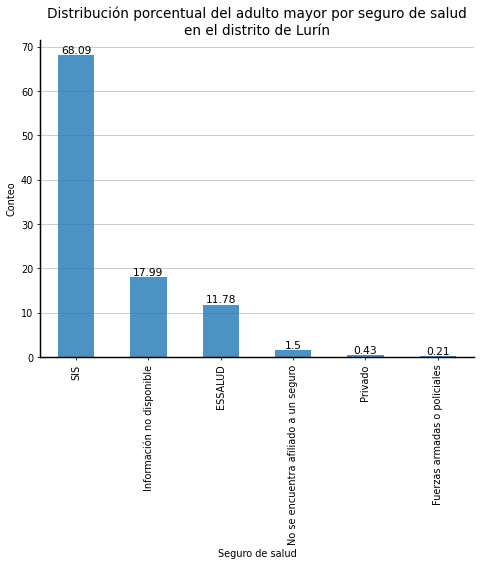

In [14]:
data["SEGSALUD"] = data["SEGSALUD"].astype(str).apply(segmentationHealthLevel)
df7 = pd.DataFrame(data["SEGSALUD"].value_counts()).apply(lambda x : 
            round(x / len(data["EDAD"]) *100,2))
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df7.plot(kind = 'bar', ax = ax, alpha = 0.8)
plt.title("Distribución porcentual del adulto mayor por seguro de salud\nen el distrito de Lurín", size = 14)
plotDecorator(ax)
plt.ylabel("Conteo")
plt.xlabel("Seguro de salud")
plt.legend().set_visible(False)
plt.show()

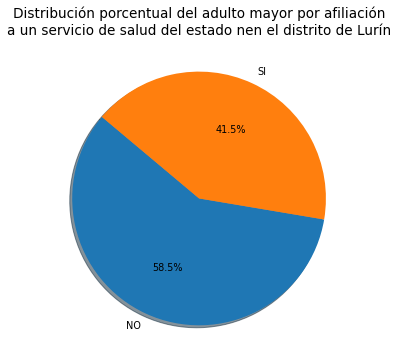

In [15]:
df8 = data["AFILSERESTADO"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df8.values, labels = df8.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor por afiliación\na un servicio de salud del estado nen el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

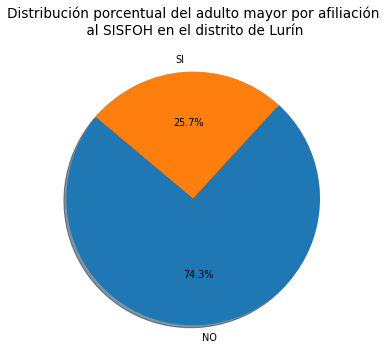

In [16]:
df9 = data["SISFOH"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df9.values, labels = df9.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor por afiliación\n al SISFOH en el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

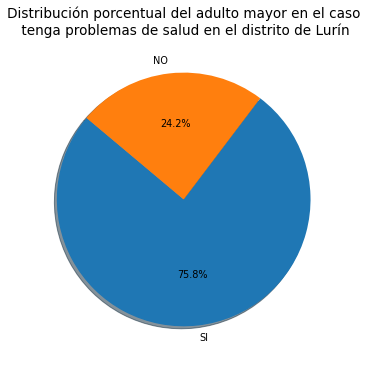

In [17]:
df10 = data["PROSALUD"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df10.values, labels = df10.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor en el caso\n tenga problemas de salud en el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

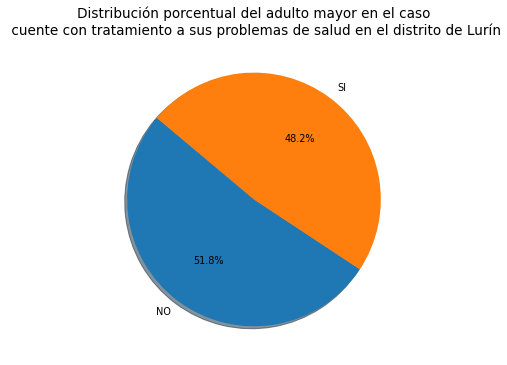

In [18]:
df11 = data["RECTRATAMIENTO"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df11.values, labels = df11.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor en el caso\n cuente con tratamiento a sus problemas de salud en el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

### 3. Condiciones de Vivienda

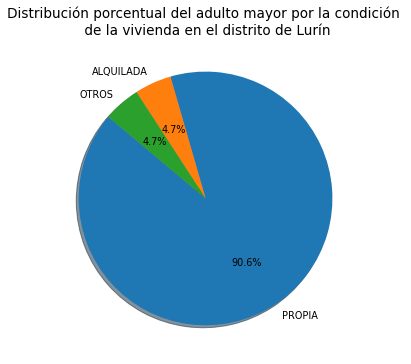

In [19]:
df12 = data["VIVIENDA"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df12.values, labels = df12.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor por la condición \n de la vivienda en el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

### 4. Inclusión y Discapacidad

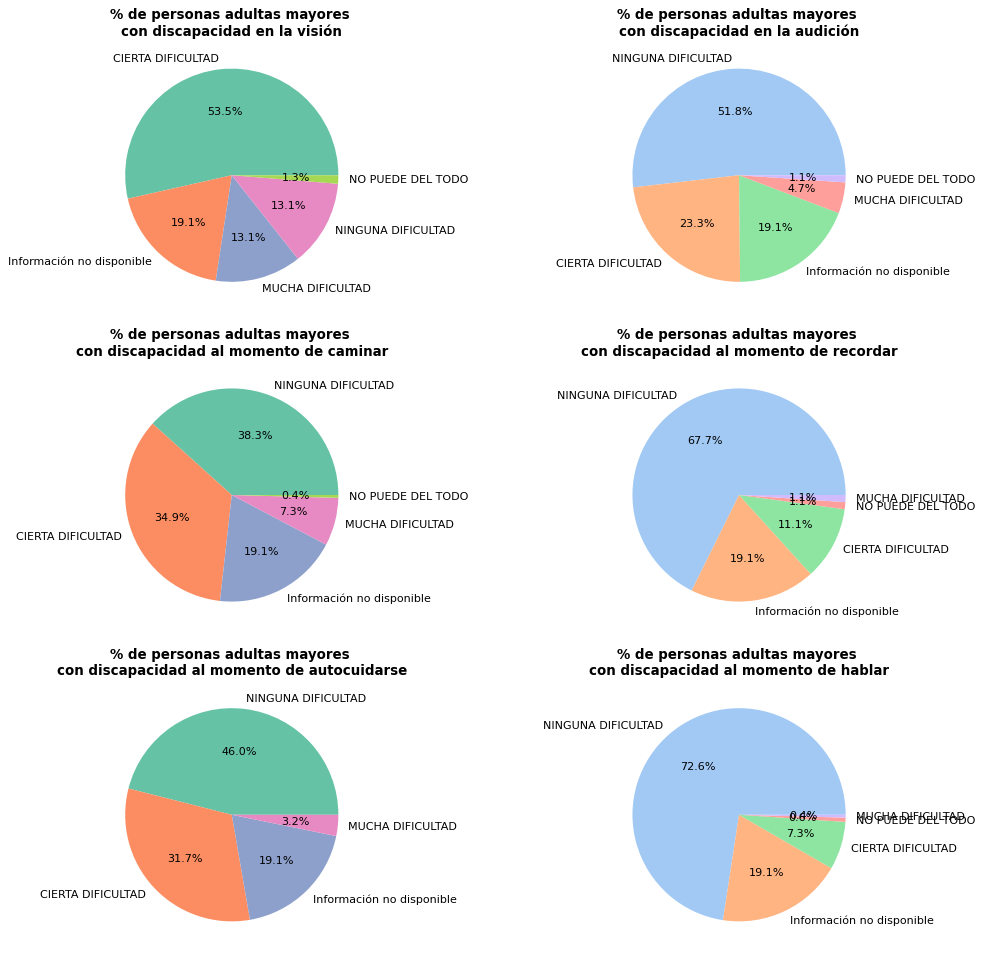

In [20]:
data["DISCVISION"] = data["DISCVISION"].fillna("Información no disponible")
data["DISCAUDITIVA"] = data["DISCAUDITIVA"].fillna("Información no disponible")
data["DISCMOTRIZ"] = data["DISCMOTRIZ"].fillna("Información no disponible")
data["DISCRECORDAR"] = data["DISCRECORDAR"].fillna("Información no disponible")
data["DISCCUIPROPIO"] = data["DISCCUIPROPIO"].fillna("Información no disponible")
data["DISCHABLAR"] = data["DISCHABLAR"].fillna("Información no disponible")

df17 = pd.DataFrame(data["DISCVISION"].value_counts())
df17_x = df17["DISCVISION"].apply(lambda x : round(x / sum(df17["DISCVISION"]) *100,2)).tolist()
df17_names = df17.index.tolist()

df18 = pd.DataFrame(data["DISCAUDITIVA"].value_counts())
df18_x = df18["DISCAUDITIVA"].apply(lambda x : round(x / sum(df18["DISCAUDITIVA"]) *100,2)).tolist()
df18_names = df18.index.tolist()

df19 = pd.DataFrame(data["DISCMOTRIZ"].value_counts())
df19_x = df19["DISCMOTRIZ"].apply(lambda x : round(x / sum(df19["DISCMOTRIZ"]) *100,2)).tolist()
df19_names = df19.index.tolist()

df20 = pd.DataFrame(data["DISCRECORDAR"].value_counts())
df20_x = df20["DISCRECORDAR"].apply(lambda x : round(x / sum(df20["DISCRECORDAR"]) *100,2)).tolist()
df20_names = df20.index.tolist()

df21 = pd.DataFrame(data["DISCCUIPROPIO"].value_counts())
df21_x = df21["DISCCUIPROPIO"].apply(lambda x : round(x / sum(df21["DISCCUIPROPIO"]) *100,2)).tolist()
df21_names = df21.index.tolist()

df22 = pd.DataFrame(data["DISCHABLAR"].value_counts())
df22_x = df22["DISCHABLAR"].apply(lambda x : round(x / sum(df22["DISCHABLAR"]) *100,2)).tolist()
df22_names = df22.index.tolist()

fig, axs = plt.subplots(3,2, figsize = (15,15), dpi = 80)
axs[0,0].pie(df17_x, labels = df17_names, autopct = '%1.1f%%', colors = sns.color_palette('Set2'))
axs[0,0].set_title("% de personas adultas mayores \ncon discapacidad en la visión",
                  fontweight = 'bold')

axs[0,1].pie(df18_x, labels = df18_names, autopct = '%1.1f%%', colors = sns.color_palette('pastel'))
axs[0,1].set_title("% de personas adultas mayores \ncon discapacidad en la audición",
                  fontweight = 'bold')

axs[1,0].pie(df19_x, labels = df19_names, autopct = '%1.1f%%', colors = sns.color_palette("Set2"))
axs[1,0].set_title("% de personas adultas mayores \ncon discapacidad al momento de caminar",
                  fontweight = 'bold')

axs[1,1].pie(df20_x, labels = df20_names, autopct = '%1.1f%%', colors = sns.color_palette('pastel'))
axs[1,1].set_title("% de personas adultas mayores \ncon discapacidad al momento de recordar",
                  fontweight = 'bold')

axs[2,0].pie(df21_x, labels = df21_names, autopct = '%1.1f%%', colors = sns.color_palette('Set2'))
axs[2,0].set_title("% de personas adultas mayores \ncon discapacidad al momento de autocuidarse",
                  fontweight = 'bold')

axs[2,1].pie(df22_x, labels = df22_names, autopct = '%1.1f%%', colors = sns.color_palette('pastel'))
axs[2,1].set_title("% de personas adultas mayores \ncon discapacidad al momento de hablar",
                  fontweight = 'bold')

plt.show()

### 5. Nivel Socioeconómico

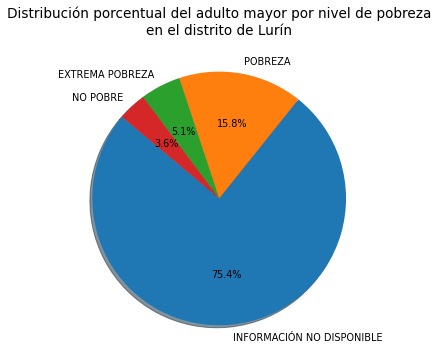

In [21]:
data["NIVPOBREZA"] = data["NIVPOBREZA"].astype(str).apply(segmentationPoverty)
df13 = data["NIVPOBREZA"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df13.values, labels = df13.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor por nivel de pobreza\nen el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

### 6. Actividad Laboral y Ocupación

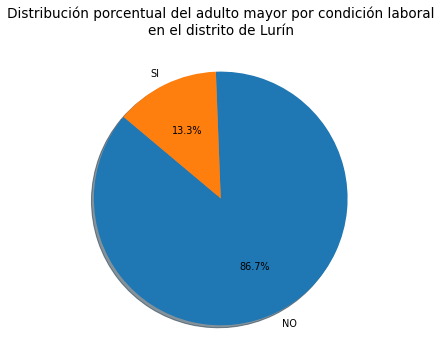

In [22]:
df14 = data["TRABAJO"].value_counts()
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.pie(df14.values, labels = df14.index, shadow = True,
       startangle = 140, autopct='%1.1f%%')
plt.title("Distribución porcentual del adulto mayor por condición laboral\nen el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

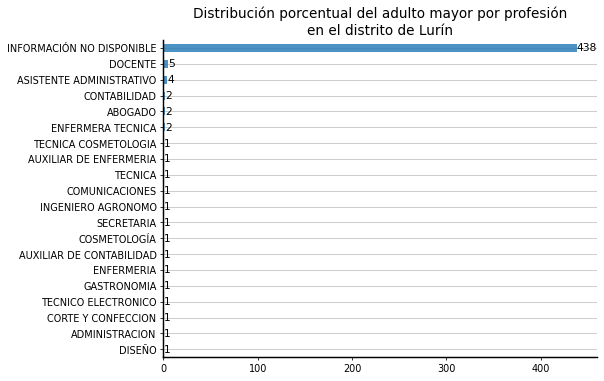

In [23]:
data["PROFESION"] = data["PROFESION"].astype(str).apply(segmentationJob)
df15 = data["PROFESION"].value_counts().sort_values(ascending = True)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df15.plot(kind = 'barh', alpha = 0.8, ax = ax)
plotDecorator(ax)
plt.title("Distribución porcentual del adulto mayor por profesión\nen el distrito de Lurín", size = 14)
plt.legend().set_visible(False)
plt.show()

In [24]:
data.drop(["CANTHIJ", "LENGMATERN"], axis = 1).to_excel(r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\dataTableau\data_personas_adultas.xlsx',
                                                       index = False)

###  **Probabilidades**

In [25]:
pd.crosstab(data["SEGSALUD"], data["SEXO"], margins = True)

SEXO,FEMENINO,MASCULINO,All
SEGSALUD,,,
ESSALUD,43,12,55
Fuerzas armadas o policiales,1,0,1
Información no disponible,64,20,84
No se encuentra afiliado a un seguro,6,1,7
Privado,1,1,2
SIS,271,47,318
All,386,81,467


In [26]:
pd.crosstab(data["VIVIENDA"], data["SEXO"], margins = True)

SEXO,FEMENINO,MASCULINO,All
VIVIENDA,,,
ALQUILADA,14,8,22
OTROS,15,7,22
PROPIA,357,66,423
All,386,81,467


In [27]:
pd.crosstab(data["DISCVISION"], data["SEXO"], margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCVISION,,,
CIERTA DIFICULTAD,204,46,250
Información no disponible,80,9,89
MUCHA DIFICULTAD,52,9,61
NINGUNA DIFICULTAD,47,14,61
NO PUEDE DEL TODO,3,3,6
All,386,81,467


In [28]:
pd.crosstab(data["DISCAUDITIVA"], data["SEXO"],margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCAUDITIVA,,,
CIERTA DIFICULTAD,80,29,109
Información no disponible,80,9,89
MUCHA DIFICULTAD,16,6,22
NINGUNA DIFICULTAD,208,34,242
NO PUEDE DEL TODO,2,3,5
All,386,81,467


In [29]:
pd.crosstab(data["DISCMOTRIZ"], data["SEXO"], margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCMOTRIZ,,,
CIERTA DIFICULTAD,126,37,163
Información no disponible,80,9,89
MUCHA DIFICULTAD,28,6,34
NINGUNA DIFICULTAD,151,28,179
NO PUEDE DEL TODO,1,1,2
All,386,81,467


In [30]:
pd.crosstab(data["DISCRECORDAR"], data["SEXO"],margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCRECORDAR,,,
CIERTA DIFICULTAD,33,19,52
Información no disponible,80,9,89
MUCHA DIFICULTAD,3,2,5
NINGUNA DIFICULTAD,267,49,316
NO PUEDE DEL TODO,3,2,5
All,386,81,467


In [31]:
pd.crosstab(data["DISCCUIPROPIO"], data["SEXO"],margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCCUIPROPIO,,,
CIERTA DIFICULTAD,117,31,148
Información no disponible,80,9,89
MUCHA DIFICULTAD,11,4,15
NINGUNA DIFICULTAD,178,37,215
All,386,81,467


In [32]:
pd.crosstab(data["DISCHABLAR"], data["SEXO"],margins = True)

SEXO,FEMENINO,MASCULINO,All
DISCHABLAR,,,
CIERTA DIFICULTAD,19,15,34
Información no disponible,80,9,89
MUCHA DIFICULTAD,1,1,2
NINGUNA DIFICULTAD,284,55,339
NO PUEDE DEL TODO,2,1,3
All,386,81,467


### **WordCloud de lo que los adultos mayores esperan recibir**

In [33]:
comentarios = pd.DataFrame(data["SERESPERA"].dropna()).rename(columns = {'SERESPERA':'COMENTARIOS'})
comentarios.head()

,COMENTARIOS
0,PENSION 65
2,TALLERES Y PASEOS
3,TALLERES
4,"QUE LO AYUDEN EN LA PENSION 65, PORQUE LE QUIT..."
5,TALLERES DE TERAPIA FISICA


In [34]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
comentarios = comentarios["COMENTARIOS"]
tokenizer = RegexpTokenizer(r'\w+')
comentarios_limpio = []
for comentario in comentarios:
    palabras = tokenizer.tokenize(comentario.lower())
    palabras_limpia = [palabra for palabra in palabras if palabra not in stop_words]
    comentarios_limpio.extend(palabras_limpia)
frecuencia_palabras = nltk.FreqDist(comentarios_limpio)
frecuencia_palabras

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabrizio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FreqDist({'talleres': 252, 'paseos': 98, 'emprendimiento': 52, 'aprender': 44, 'terapia': 26, 'manualidades': 16, 'mas': 16, 'tejido': 15, 'fisica': 14, 'taller': 14, ...})

In [35]:
frecuencias_palabras_dic = dict(frecuencia_palabras)
frecuencias_palabras_dic = pd.DataFrame(list(frecuencias_palabras_dic.items()),
                                       columns = ['Palabra', 'Frecuencia'])
frecuencias_palabras_dic = frecuencias_palabras_dic.sort_values("Frecuencia",
                                        ascending = False)
frecuencias_palabras_dic

,Palabra,Frecuencia
2,talleres,252
3,paseos,98
8,emprendimiento,52
9,aprender,44
6,terapia,26
...,...,...
63,ofrecer,1
62,puedan,1
16,viveres,1
19,enseñan,1


In [36]:
frecuencias_palabras_dic.to_excel(r'wordcloud.xlsx',
                                 index = False)

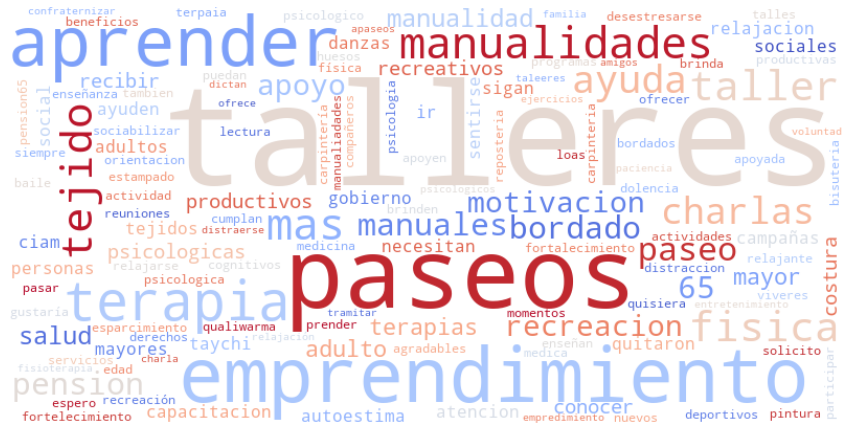

In [37]:
wordcloud = WordCloud(width = 800, height = 400, 
                     background_color = 'white',
                      colormap = 'coolwarm_r').generate_from_frequencies(frecuencia_palabras)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### **Modelo de Machine Learning**

In [38]:
data_ml = pd.read_csv(r'dataset_Lurin.csv', 
                  encoding = 'latin-1', delimiter = ";").iloc[:,1:]
data_ml.head()

,FECHACORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,SEXO,FECHNACI,EDAD,ESTCIV,CANTHIJ,...,PROSALUD,RECTRATAMIENTO,DISCVISION,DISCAUDITIVA,DISCMOTRIZ,DISCRECORDAR,DISCCUIPROPIO,DISCHABLAR,CONADIS,SERESPERA
0,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,10/02/1941,82,SOLTERO(A),2.0,...,SI,SI,NaN,NaN,NaN,NaN,NaN,NaN,NO,PENSION 65
1,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,08/10/1960,62,VIUDO(A),8.0,...,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
2,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,01/07/1956,66,SOLTERO(A),1.0,...,NO,NO,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,NO,TALLERES Y PASEOS
3,07/06/2023,LIMA,LIMA,LURIN,150119,FEMENINO,30/01/1954,69,CASADO(A),NaN,...,SI,SI,CIERTA DIFICULTAD,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NINGUNA DIFICULTAD,CIERTA DIFICULTAD,NINGUNA DIFICULTAD,NO,TALLERES
4,07/06/2023,LIMA,LIMA,LURIN,150119,MASCULINO,02/07/1934,88,CASADO(A),5.0,...,SI,NO,NO PUEDE DEL TODO,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,CIERTA DIFICULTAD,NO,"QUE LO AYUDEN EN LA PENSION 65, PORQUE LE QUIT..."


In [39]:
data_ml = data_ml[["SEXO", "EDAD", "ESTCIV", "CANTHIJ", "ETNIA", "LENGMATERN", 
                  "VIVIENDA", "SEGSALUD", "AFILSERESTADO", "SISFOH", "NIVPOBREZA",
                  "TRABAJO", "PROSALUD", "RECTRATAMIENTO"]]

In [40]:
# Imputar valores numéricos
imr_num = SimpleImputer(missing_values = np.nan, strategy = 'median')
data_ml["CANTHIJ"] = imr_num.fit_transform(data_ml[["CANTHIJ"]])

In [41]:
imr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
columns = ["LENGMATERN", "SEGSALUD", "NIVPOBREZA"]
data_ml[columns] = imr_cat.fit_transform(data_ml[columns])

In [42]:
data_ml["SEXO"] = data_ml["SEXO"].map({'FEMENINO':0, 'MASCULINO':1})
data_ml["AFILSERESTADO"] = data_ml["AFILSERESTADO"].map({'SI':1, 'NO':0})
data_ml["SISFOH"] = data_ml["SISFOH"].map({'SI':1, 'NO':0})
data_ml["TRABAJO"] = data_ml["TRABAJO"].map({'SI':1, 'NO':0}) 
data_ml["PROSALUD"] = data_ml["PROSALUD"].map({'SI':1, 'NO':0})
data_ml["RECTRATAMIENTO"] = data_ml["RECTRATAMIENTO"].map({'SI':1, 'NO':0})

In [43]:
data_ml = pd.get_dummies(data_ml, columns = ["ESTCIV", "ETNIA", "LENGMATERN",
                        "VIVIENDA", "SEGSALUD", "NIVPOBREZA"])
data_ml.head()

,SEXO,EDAD,CANTHIJ,AFILSERESTADO,SISFOH,TRABAJO,PROSALUD,RECTRATAMIENTO,ESTCIV_CASADO(A),ESTCIV_CONVIVIENTE,...,VIVIENDA_OTROS,VIVIENDA_PROPIA,SEGSALUD_ESSALUD,SEGSALUD_Fuerzas armadas o policiales,SEGSALUD_No se encuentra afiliado a un seguro,SEGSALUD_Privado,SEGSALUD_SIS,NIVPOBREZA_EXTREMA POBREZA,NIVPOBREZA_NO POBRE,NIVPOBREZA_POBREZA
0,0,82,2.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,62,8.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,66,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,69,4.0,0,1,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,1
4,1,88,5.0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [44]:
data_ml = data_ml[['PROSALUD', 'SISFOH', 'EDAD', 'CANTHIJ', 'NIVPOBREZA_NO POBRE',
       'AFILSERESTADO', 'LENGMATERN_QUECHUA', 'ESTCIV_CONVIVIENTE',
       'ESTCIV_CASADO(A)', "RECTRATAMIENTO"]]

In [45]:
# Dividir datos de entrenamiento y test
X, y = data_ml.drop("RECTRATAMIENTO", axis = 1).values, data_ml.pop("RECTRATAMIENTO").values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [47]:
# stdsc = StandardScaler()
# X_train_std = stdsc.fit_transform(X_train)
# X_test_std = stdsc.fit_transform(X_test)

In [48]:
tree = DecisionTreeClassifier(criterion = 'gini',
                               random_state = 1,
                               max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [49]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [50]:
predictions = tree.predict(X_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0], dtype=int64)

In [51]:
accuracy_score(y_test, predictions)

0.7553191489361702

In [52]:
confusion_matrix(y_test, predictions, labels = [0,1])

array([[34, 15],
       [ 8, 37]], dtype=int64)

In [53]:
precision_score(y_test, predictions)

0.7115384615384616

In [54]:
recall_score(y_test, predictions)

0.8222222222222222

In [55]:
print(classification_report(y_test, predictions, target_names = ['No tiene tratamiento','Tiene Tratamiento']))

                      precision    recall  f1-score   support

No tiene tratamiento       0.81      0.69      0.75        49
   Tiene Tratamiento       0.71      0.82      0.76        45

            accuracy                           0.76        94
           macro avg       0.76      0.76      0.76        94
        weighted avg       0.76      0.76      0.75        94



In [56]:
tree.classes_

array([0, 1], dtype=int64)

In [57]:
tree.predict_proba(X_test)

array([[0.09459459, 0.90540541],
       [0.09459459, 0.90540541],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.76190476, 0.23809524],
       [0.76190476, 0.23809524],
       [0.76190476, 0.23809524],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.09459459, 0.90540541],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [0.39705882, 0.60294118],
       [0.39705882, 0.60294118],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.09459459, 0.90540541],
       [1.        , 0.        ],
       [0.39705882, 0.60294118],
       [0.76190476, 0.23809524],
       [1.        , 0.        ],
       [0.3030303 , 0.6969697 ],
       [0.3030303 , 0.6969697 ],
       [0.39705882, 0.60294118],
       [0.39705882, 0.60294118],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.09459459, 0.90540541],
       [0.39705882, 0.60294118],
       [0.76190476, 0.23809524],
       [0.

In [58]:
feature_importance = pd.DataFrame(tree.feature_importances_, 
                            index = data_ml.columns).sort_values(0, ascending = False)
feature_importance

,0
PROSALUD,0.540914
SISFOH,0.183366
EDAD,0.081639
CANTHIJ,0.066740
AFILSERESTADO,0.037713
LENGMATERN_QUECHUA,0.034791
ESTCIV_CONVIVIENTE,0.030927
NIVPOBREZA_NO POBRE,0.023909
ESTCIV_CASADO(A),0.000000


In [59]:
feature_importance.reset_index().rename(columns = {0:'Importancia'}).to_excel(r'importance_feature.xlsx', 
                                                                index = False)

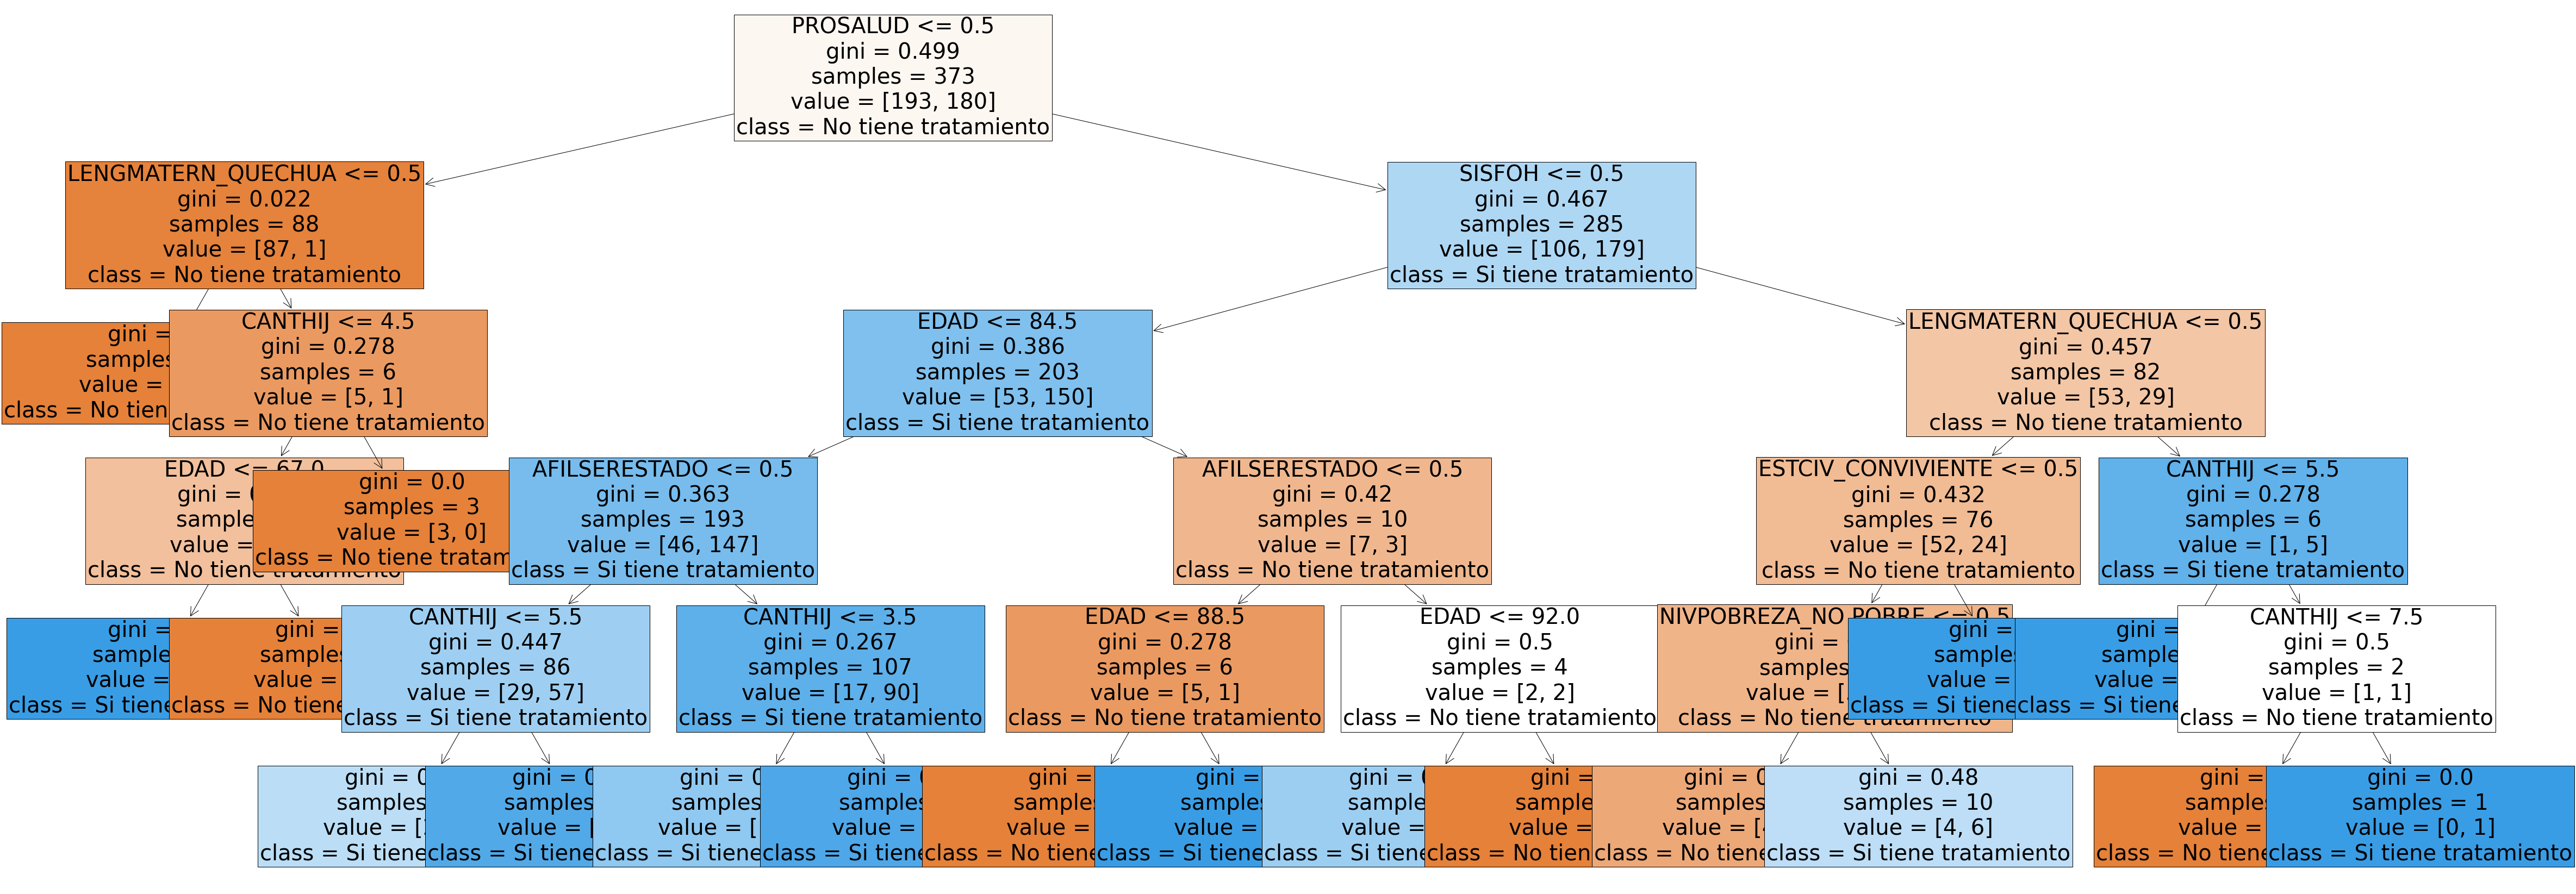

In [60]:
path = r'utils\img'
fig, ax = plt.subplots(figsize = (80,30))
fig = trees.plot_tree(tree, feature_names = data_ml.columns,
            class_names = {0:'No tiene tratamiento', 1:'Si tiene tratamiento'},
            filled = True, fontsize = 40)
plt.savefig(path + '\\treedecision.png')
plt.show()

In [61]:
print(trees.export_text(tree, feature_names = ['PROSALUD', 'SISFOH', 'EDAD', 'CANTHIJ', 'AFILSERESTADO',
       'LENGMATERN_QUECHUA', 'ESTCIV_CONVIVIENTE', 'NIVPOBREZA_NO POBRE',
       'ESTCIV_CASADO(A)']))

|--- PROSALUD <= 0.50
|   |--- ESTCIV_CONVIVIENTE <= 0.50
|   |   |--- class: 0
|   |--- ESTCIV_CONVIVIENTE >  0.50
|   |   |--- CANTHIJ <= 4.50
|   |   |   |--- EDAD <= 67.00
|   |   |   |   |--- class: 1
|   |   |   |--- EDAD >  67.00
|   |   |   |   |--- class: 0
|   |   |--- CANTHIJ >  4.50
|   |   |   |--- class: 0
|--- PROSALUD >  0.50
|   |--- SISFOH <= 0.50
|   |   |--- EDAD <= 84.50
|   |   |   |--- LENGMATERN_QUECHUA <= 0.50
|   |   |   |   |--- CANTHIJ <= 5.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CANTHIJ >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- LENGMATERN_QUECHUA >  0.50
|   |   |   |   |--- CANTHIJ <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CANTHIJ >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- EDAD >  84.50
|   |   |   |--- LENGMATERN_QUECHUA <= 0.50
|   |   |   |   |--- EDAD <= 88.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EDAD >  88.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- LENGMAT

In [62]:
print('''
'PROSALUD', 'SISFOH', 'EDAD', 'CANTHIJ', 'NIVPOBREZA_NO POBRE',
'AFILSERESTADO', 'LENGMATERN_QUECHUA', 'ESTCIV_CONVIVIENTE',
'ESTCIV_CASADO(A)'
''')


'PROSALUD', 'SISFOH', 'EDAD', 'CANTHIJ', 'NIVPOBREZA_NO POBRE',
'AFILSERESTADO', 'LENGMATERN_QUECHUA', 'ESTCIV_CONVIVIENTE',
'ESTCIV_CASADO(A)'



In [91]:
tree.predict([[1,0,86,2,0,0,1,0,1]])

array([0], dtype=int64)

In [107]:
print(tree.predict([[1,0,86,1,1,0,1,1,0]]))
print(tree.predict_proba([[1,0,86,1,1,0,1,1,0]]))

[0]
[[1. 0.]]
